# Predição de Vôos Atrasados

Meu objetivo é prever, para um determinado aeroporto e companhia aérea, atrasos no pouso. Para isso, inicialmente irei analisar os aeroportos com maior número de atrasos em cada mês do ano e escolher o aeroporto que contém uma quantidade de dados significativas e suficientes para treinar o modelo adequadamente. Estarei seguindo o tutorial disponível em https://www.kaggle.com/fabiendaniel/predicting-flight-delays-tutorial. Como se trata de um tutorial de 2017, algumas mudanças de funções e bibliotecas depreciadas foram feitas. Além disso, outras modificações foram necessárias porque parte da base de dados que eu selecionei e meu objetivo foram diferentes.

Importando as bibliotecas necessárias

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import OrderedDict

Lendo o arquivo com as informações sobre todos os vôos

In [2]:
df = pd.read_csv('flights.csv')

/var/folders/q4/_8dm9trs61l02px1wmml5vhh0000gn/T/ipykernel_1708/3476983621.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('flights.csv')


Olhando as informações sobre os 5 primeiros vôos, podemos perceber que cada vôos possui 31 features, abaixo descrevi o significado de cada uma delas.

In [3]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### Informações sobre as features dos vôos

YEAR: ano

MONTH: mês

DAY: dia do mês, entre 1 e 31

DAY_OF_WEEK: dia da semana, entre 1 e 7, de segunda a domingo, respectivamente

AIRLINE: sigla da companhia aérea

FLIGHT_NUMBER: número do vôo, um único número para cada rota

TAIL_NUMBER: número da calda do avião, um único número para cada aeronave

ORIGIN_AIRPORT: sigla do aeroporto de origem

DESTINATION_AIRPORT: sigla do aeroporto de destino

SCHEDULED_DEPARTURE: horário marcado de saída no formato hhmm

DEPARTURE_TIME: horário de saída no formato hhmm

DEPARTURE_DELAY: atraso na saída em minutos

TAXI_OUT: tempo decorrido entre a saída do portão do aeroporto de origem e o momento que as rodas deixam o chão em minutos

WHEELS_OFF: o horário em que as rodas da aeronave deixam o chão no formato hhmm

SCHEDULED_TIME: previsão da duração do vôo em minutos

ELAPSED_TIME: AIR_TIME+TAXI_IN+TAXI_OUT, ou seja, a soma entre o tempo desde que as rodas saíram do chão no aeroporto de origem até quando elas retornaram ao chão no aeroporto de destino, o tempo decorrido entre a saída do portão do aeroporto de origem e o momento que as rodas deixam o chão e o tempo decorrido entre o momento que as rodas retornam ao chão no aeroporto de destino até a chegada no portão, em minutos

AIR_TIME: o tempo desde que as rodas saíram do chão no aeroporto de origem até quando elas retornaram ao chão no aeroporto de destino

DISTANCE: distância entre o aeroporto de origem e o aeroporto de destino

WHEELS_ON: o horário em que as rodas da aeronave retornam ao chão no aeroporto de destino no formato hhmm

TAXI_IN: o tempo decorrido entre o momento que as rodas retornam ao chão no aeroporto de destino até a chegada no portão em minutos

SCHEDULED_ARRIVAL: previsão do horário de chegada no aeroporto de destino no formato hhmm

ARRIVAL_TIME: WHEELS_ON+TAXI_IN, ou seja, o horário que a aeronave chega ao portão do aeroporto de destino no formato hhmm

ARRIVAL_DELAY: ARRIVAL_TIME-SCHEDULED_ARRIVAL, ou seja, atraso na chegada em minutos

DIVERTED: 0 se não houve desvio e 1, caso contrário

CANCELLED: 0 se o vôo não foi cancelado e 1, caso contrário

CANCELLATION_REASON: motivo do cancelamento, sendo A - companhia aérea/acidente, B - clima, C - sistema aéreo nacional, D - segurança

AIR_SYSTEM_DELAY: atraso causado pelo sistema aéreo em minutos

SECURITY_DELAY: atraso causado por motivos de segurança em minutos

AIRLINE_DELAY: atraso causado pela companhia aérea em minutos

LATE_AIRCRAFT_DELAY: atraso causado por acidente aéreo em minutos

WEATHER_DELAY: atraso causado por clima em minutos

Os valores que nos interessam aqui são aqueles sobre atraso na saída (DEPARTURE_DELAY) e atraso na chegada (ARRIVAL_DELAY), esses valores são interessantes para se ter idéia, por exemplo, se a média do atraso na saída é próxima da média do atraso na chegada, em outras palavras, se ao longo do percurso a aeronave aumenta a velocidade para compensar o atraso na saída

In [4]:
df.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


Ao total temos informações sobre 5.819.079 vôos

In [5]:
df.shape

(5819079, 31)

In [6]:
df.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

Podemos ver que existem várias features que possuem valores nulos, inclusive features que serão utilizadas no nosso modelo (como, por exemplo, ARRIVAL_DELAY) portanto, na construção do modelo, devemos excluir ou preencher essas linhas

In [7]:
df.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

A quantidade nem sempre é uma boa métrica para análise, por isso decidi analisar as células nulas em porcentagem

In [8]:
tab_info=pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.rename(index={0:'valores nulos (%)'})
tab_info

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
valores nulos (%),0.0,0.0,0.0,0.0,0.0,0.0,0.252978,0.0,0.0,0.0,...,1.589822,1.805629,0.0,0.0,98.455357,81.72496,81.72496,81.72496,81.72496,81.72496


As features com dados sobre atrasos incluem os vôos que chegaram e partiram adiantados, então decidi incluir análises sobre vôos que chegaram somente atrasados. Por esse motivo criei uma nova tabela com esses dados.

In [9]:
flight_delays = df[df['ARRIVAL_DELAY']>0.0]
flight_delays.shape

(2086896, 31)

Perceba que agora os índices mudaram e a coluna 'ARRIVAL_DELAY' possui somente valores positivos.

In [10]:
flight_delays.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
14,2015,1,1,4,DL,2440,N651DL,SEA,MSP,40,...,557.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
20,2015,1,1,4,NK,520,N525NK,LAS,MCI,55,...,543.0,6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
21,2015,1,1,4,AA,371,N3GXAA,SEA,MIA,100,...,939.0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Lendo o arquivo com as informações sobre todos os aeroportos porque na tabela com os dados sobre os vôos temos apenas as siglas e, para quem vai visualizar o gráfico, os nomes facilitam o entendimento.

In [11]:
airports = pd.read_csv('airports.csv')

In [12]:
import cartopy.crs as ccrs

Distribuição geográfica da área coberta pelo conjunto de dados.

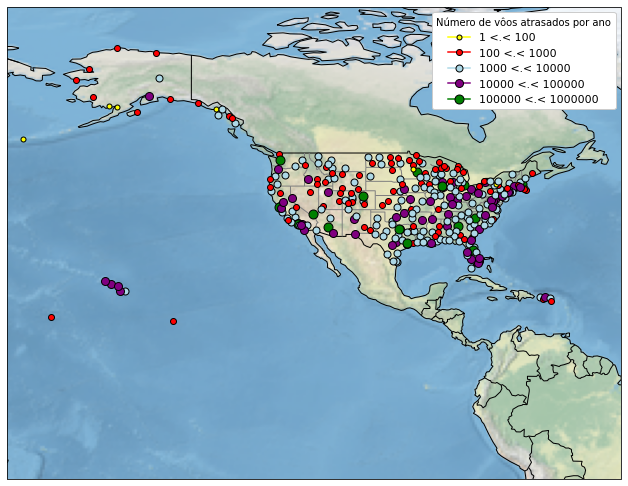

In [13]:
import cartopy.feature as cf

count_flights = df['DESTINATION_AIRPORT'].value_counts()

plt.figure(figsize=(11, 11))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.set_xlim(-180, -50)
ax.set_ylim(-20, 80)

colors = ['yellow', 'red', 'lightblue', 'purple', 'green', 'orange']
size_limits = [1, 100, 1000, 10000, 100000, 1000000]
labels = []
for i in range(len(size_limits)-1):
    labels.append("{} <.< {}".format(size_limits[i], size_limits[i+1])) 

#map = Basemap(resolution='i',llcrnrlon=-180, urcrnrlon=-50,
#              llcrnrlat=10, urcrnrlat=75, lat_0=0, lon_0=0,)
#map.shadedrelief()
ax.coastlines()
#map.drawcountries(linewidth = 3)
#map.drawstates(color='0.3')
ax.add_feature(cf.BORDERS)
ax.add_feature(cf.NaturalEarthFeature(
    'cultural', 'admin_1_states_provinces_lines', '110m',
    edgecolor='gray', facecolor='none'))

for index, (code, y,x) in airports[['IATA_CODE', 'LATITUDE', 'LONGITUDE']].iterrows():
    #x, y = map(x, y)
    isize = [i for i, val in enumerate(size_limits) if val < count_flights[code]]
    ind = isize[-1]
    plt.plot(x, y, marker='o', markersize = ind+5, markeredgewidth = 1, color = colors[ind],
             markeredgecolor='k', label = labels[ind])
    
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
key_order = ('1 <.< 100', '100 <.< 1000', '1000 <.< 10000',
             '10000 <.< 100000', '100000 <.< 1000000')
new_label = OrderedDict()
for key in key_order:
    new_label[key] = by_label[key]
plt.legend(new_label.values(), new_label.keys(), loc = 1, prop= {'size':11},
           title='Número de vôos atrasados por ano', frameon = True, framealpha = 1)
plt.show()

Distribuição geográfica dos aeroportos com vôos atrasados. Podemos perceber que no caso dos aeroportos que receberam um grande número (100000 <.< 1000000) de vôos atrasados, quando excluímos os vôos adiantados, o número decresce de maior ou igual a 12 para maior ou igual a 2.

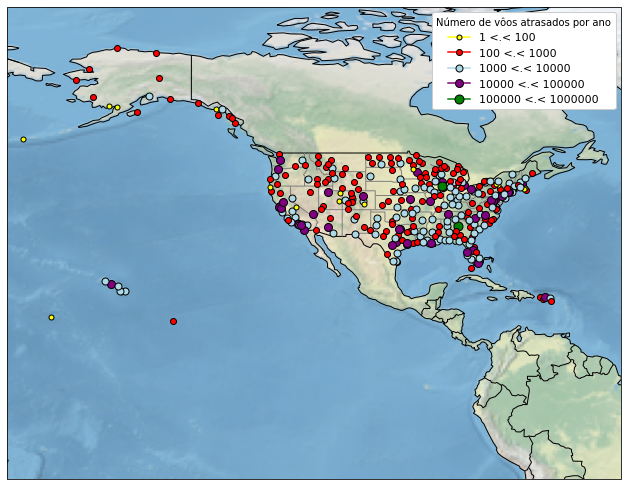

In [14]:
count_flights = flight_delays['DESTINATION_AIRPORT'].value_counts()

plt.figure(figsize=(11, 11))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
#ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
ax.set_xlim(-180, -50)
ax.set_ylim(-20, 80)

colors = ['yellow', 'red', 'lightblue', 'purple', 'green', 'orange']
size_limits = [1, 100, 1000, 10000, 100000, 1000000]
labels = []
for i in range(len(size_limits)-1):
    labels.append("{} <.< {}".format(size_limits[i], size_limits[i+1])) 

#map = Basemap(resolution='i',llcrnrlon=-180, urcrnrlon=-50,
#              llcrnrlat=10, urcrnrlat=75, lat_0=0, lon_0=0,)
#map.shadedrelief()
ax.coastlines()
#map.drawcountries(linewidth = 3)
#map.drawstates(color='0.3')
ax.add_feature(cf.BORDERS)
ax.add_feature(cf.NaturalEarthFeature(
    'cultural', 'admin_1_states_provinces_lines', '110m',
    edgecolor='gray', facecolor='none'))

for index, (code, y,x) in airports[['IATA_CODE', 'LATITUDE', 'LONGITUDE']].iterrows():
    #x, y = map(x, y)
    isize = [i for i, val in enumerate(size_limits) if val < count_flights[code]]
    ind = isize[-1]
    plt.plot(x, y, marker='o', markersize = ind+5, markeredgewidth = 1, color = colors[ind],
             markeredgecolor='k', label = labels[ind])
    
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
key_order = ('1 <.< 100', '100 <.< 1000', '1000 <.< 10000',
             '10000 <.< 100000', '100000 <.< 1000000')
new_label = OrderedDict()
for key in key_order:
    new_label[key] = by_label[key]
plt.legend(new_label.values(), new_label.keys(), loc = 1, prop= {'size':11},
           title='Número de vôos atrasados por ano', frameon = True, framealpha = 1)
plt.show()

Distribuição dos atrasos durante os meses do ano.

Text(0, 0.5, 'Número de vôos')

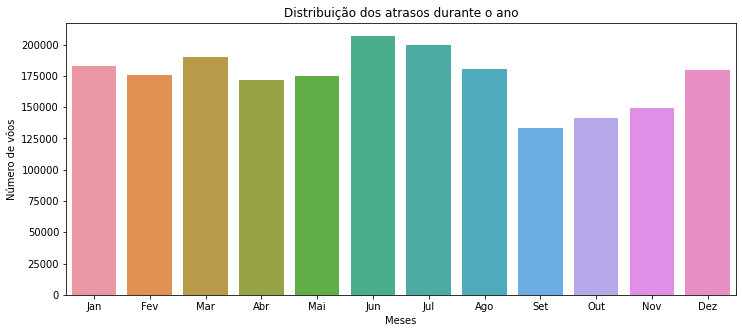

In [15]:
plt.figure(figsize=(12, 5))

meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

ax1 = sns.countplot(x='MONTH', data=flight_delays)

ax1.set_xticklabels(meses)

plt.title('Distribuição dos atrasos durante o ano')
plt.xlabel('Meses')
plt.ylabel('Número de vôos')

Distribuição dos atrasos de acordo com a companhia aérea.

Text(0, 0.5, 'Número de vôos')

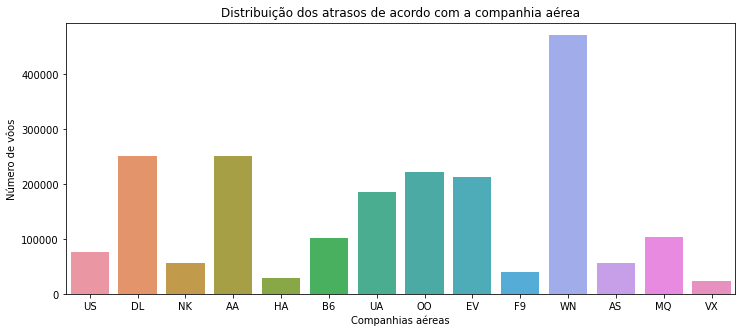

In [16]:
plt.figure(figsize=(12, 5))

ax2 = sns.countplot(x='AIRLINE', data=flight_delays)

plt.title('Distribuição dos atrasos de acordo com a companhia aérea')
plt.xlabel('Companhias aéreas')
plt.ylabel('Número de vôos')

Text(0, 0.5, 'Número de vôos')

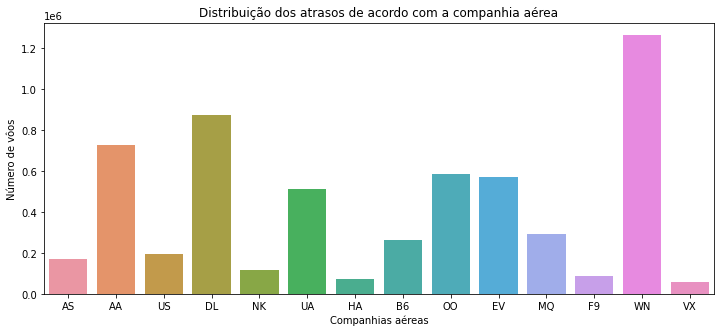

In [17]:
plt.figure(figsize=(12, 5))

ax2 = sns.countplot(x='AIRLINE', data=df)

plt.title('Distribuição dos atrasos de acordo com a companhia aérea')
plt.xlabel('Companhias aéreas')
plt.ylabel('Número de vôos')

Lendo o arquivo com as informações sobre todas as companhias aéreas porque na tabela com os dados sobre os vôos temos apenas as siglas e para quem vai visualizar o gráfico, os nomes facilitam o entendimento.

In [18]:
airlines = pd.read_csv('airlines.csv')

In [19]:
airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


Dado o tamanho do conjunto de dados e sendo junho o mês que teve o maior número de vôos atrasados, eu vou manter apenas os vôos de Junho de 2015.

In [20]:
df = df[df['MONTH']==6]

Adicionando uma feature no conjunto de dados que une as features 'YEAR', 'MONTH' e 'DAY' para facilitar a visualização e o entendimento.

In [21]:
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])

In [22]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
2385615,2015,6,1,1,NK,298,N616NK,LAS,IAH,10,...,97.0,0,0,NaN,97.0,0.0,0.0,0.0,0.0,2015-06-01
2385616,2015,6,1,1,AA,1230,N3EPAA,SEA,DFW,15,...,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-06-01
2385617,2015,6,1,1,DL,2044,N6701,ANC,SLC,15,...,-1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-06-01
2385618,2015,6,1,1,US,448,N151UW,SLC,CLT,15,...,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-06-01
2385619,2015,6,1,1,F9,1126,N214FR,LAS,IAD,15,...,3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-06-01


A função format_heure recebe os horários no formato hhmm e converte para o formato hh:mm:ss e faz um tratamento dos casos 2400.

In [23]:
import datetime

def format_heure(chaine):
    if pd.isnull(chaine):
        return np.nan
    else:
        if chaine == 2400:
            chaine = 0
        chaine = int(chaine)
        chaine = "{0:04d}".format(chaine)
        heure = datetime.time(int(chaine[0:2]), int(chaine[2:4]))
        return heure

def combine_date_heure(x):
    if pd.isnull(x[0]) or pd.isnull(x[1]):
        return np.nan
    else:
        return datetime.datetime.combine(x[0],x[1])

def create_flight_time(df, col):    
    liste = []
    for index, cols in df[['DATE', col]].iterrows():
        if pd.isnull(cols[1]):
            liste.append(np.nan)
        elif float(cols[1]) == 2400:
            cols[0] += datetime.timedelta(days=1)
            cols[1] = datetime.time(0,0)
            liste.append(combine_date_heure(cols))
        else:
            cols[1] = format_heure(cols[1])
            liste.append(combine_date_heure(cols))
    return pd.Series(liste)

In [24]:
df['SCHEDULED_DEPARTURE']

2385615      10
2385616      15
2385617      15
2385618      15
2385619      15
           ... 
2889507    2359
2889508    2359
2889509    2359
2889510    2359
2889511    2359
Name: SCHEDULED_DEPARTURE, Length: 503897, dtype: int64

Mudamos o formato das features 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'SCHEDULED_ARRIVAL' e 'ARRIVAL_TIME' aplicando a função format_heure. 

In [25]:
#df['SCHEDULED_DEPARTURE'] = create_flight_time(df, 'SCHEDULED_DEPARTURE')
df['SCHEDULED_DEPARTURE'] = df['SCHEDULED_DEPARTURE'].apply(format_heure)
df['DEPARTURE_TIME'] = df['DEPARTURE_TIME'].apply(format_heure)
df['SCHEDULED_ARRIVAL'] = df['SCHEDULED_ARRIVAL'].apply(format_heure)
df['ARRIVAL_TIME'] = df['ARRIVAL_TIME'].apply(format_heure)

df.loc[:5, ['SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'DEPARTURE_TIME',
             'ARRIVAL_TIME', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY']]

,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,DEPARTURE_TIME,ARRIVAL_TIME,DEPARTURE_DELAY,ARRIVAL_DELAY


In [26]:
df['SCHEDULED_ARRIVAL']

2385615    05:00:00
2385616    06:10:00
2385617    06:52:00
2385618    06:07:00
2385619    07:45:00
             ...   
2889507    06:00:00
2889508    05:20:00
2889509    06:08:00
2889510    06:09:00
2889511    05:34:00
Name: SCHEDULED_ARRIVAL, Length: 503897, dtype: object

Ainda com o objetivo de melhorar a visualização e o entendimento, eu uni a data e o horário programado para a chegada na feature 'SCHEDULED_ARRIVAL' e converti para o tipo datetime64.

In [27]:
df['SCHEDULED_ARRIVAL'] = df.apply(lambda r : pd.datetime.combine(r['DATE'],r['SCHEDULED_ARRIVAL']),1)

/var/folders/q4/_8dm9trs61l02px1wmml5vhh0000gn/T/ipykernel_1708/4136187038.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df['SCHEDULED_ARRIVAL'] = df.apply(lambda r : pd.datetime.combine(r['DATE'],r['SCHEDULED_ARRIVAL']),1)


In [28]:
df['SCHEDULED_ARRIVAL']

2385615   2015-06-01 05:00:00
2385616   2015-06-01 06:10:00
2385617   2015-06-01 06:52:00
2385618   2015-06-01 06:07:00
2385619   2015-06-01 07:45:00
                  ...        
2889507   2015-06-30 06:00:00
2889508   2015-06-30 05:20:00
2889509   2015-06-30 06:08:00
2889510   2015-06-30 06:09:00
2889511   2015-06-30 05:34:00
Name: SCHEDULED_ARRIVAL, Length: 503897, dtype: datetime64[ns]

As features 'DEPARTURE_TIME' e 'ARRIVAL_TIME' podem ser mal interpretadas visto que elas não contem as datas. Por exemplo, se o vôo foi programada para sair no dia primeiro de Janeiro às 00:05 horas e o 'DEPARTURE_TIME' indica 23:54 horas, não sabemos se o vôo saiu antes do horário ou se houve um grande atraso, a não ser que 'DEPARTURE_DELAY' também seja analisado. Visto que, dentre as features, temos 'DEPARTURE_DELAY' e 'ARRIVAL_DELAY', não vou usar 'DEPARTURE_TIME' e 'ARRIVAL_TIME'. Além dessas, outras features não essenciais serão removidas.

In [29]:
variables_to_remove = ['WHEELS_ON', 'WHEELS_OFF', 'YEAR', 
                       'MONTH','DAY','DAY_OF_WEEK','DATE', 'AIR_SYSTEM_DELAY',
                       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
                       'WEATHER_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
                       'FLIGHT_NUMBER', 'TAIL_NUMBER', 'AIR_TIME']
df.drop(variables_to_remove, axis = 1, inplace = True)
df = df[['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
        'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
        'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
        'SCHEDULED_TIME', 'ELAPSED_TIME', 'TAXI_OUT', 'TAXI_IN']]
df[:5]

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,TAXI_OUT,TAXI_IN
2385615,NK,LAS,IAH,00:10:00,01:42:00,92.0,2015-06-01 05:00:00,06:37:00,97.0,170.0,175.0,17.0,9.0
2385616,AA,SEA,DFW,00:15:00,00:23:00,8.0,2015-06-01 06:10:00,06:15:00,5.0,235.0,232.0,12.0,3.0
2385617,DL,ANC,SLC,00:15:00,00:11:00,-4.0,2015-06-01 06:52:00,06:51:00,-1.0,277.0,280.0,11.0,8.0
2385618,US,SLC,CLT,00:15:00,00:04:00,-11.0,2015-06-01 06:07:00,05:45:00,-22.0,232.0,221.0,12.0,7.0
2385619,F9,LAS,IAD,00:15:00,00:17:00,2.0,2015-06-01 07:45:00,07:48:00,3.0,270.0,271.0,13.0,8.0


Examinando quão completo é o conjunto de dados, ou seja, a porcentagem das linhas que estão preenchidas.

In [30]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,ARRIVAL_DELAY,11050,97.807092
1,ELAPSED_TIME,11050,97.807092
2,ARRIVAL_TIME,9389,98.136722
3,TAXI_IN,9389,98.136722
4,TAXI_OUT,9055,98.203006
5,DEPARTURE_TIME,8698,98.273854
6,DEPARTURE_DELAY,8698,98.273854
7,AIRLINE,0,100.000000
8,ORIGIN_AIRPORT,0,100.000000
9,DESTINATION_AIRPORT,0,100.000000


Removendo as linhas com valores nulos visto que temos um bom fator de preenchimento.

In [31]:
df.dropna(inplace = True)

Após todo o processo de limpeza e tratamento dos dados, temos 492847 vôos de Junho com todas as linhas preenchidas e 13 features.

In [32]:
df.shape

(492847, 13)

Colocando em um dicionário as siglas e nomes das companhias aéreas.

In [33]:
abbr_companies = airlines.set_index('IATA_CODE')['AIRLINE'].to_dict()

A seguir podemos ver a média dos atrasos de cada companhia aérea, bem como o atraso mínimo, máximo e o total de atrasos. Lembrando que incluímos nos atrasos, os vôos que chegaram adiantados. A companhia aérea com o vôo mais atrasado em Junho foi a American Airlines Inc. (AA).

In [34]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

global_stats = df['ARRIVAL_DELAY'].groupby(df['AIRLINE']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

,min,max,count,mean
AIRLINE,,,,
VX,-53.0,651.0,5227.0,5.779415
HA,-39.0,957.0,6663.0,0.882786
F9,-42.0,814.0,7814.0,19.712951
NK,-48.0,697.0,9325.0,35.561501
AS,-66.0,950.0,14985.0,-0.220621
B6,-61.0,556.0,22246.0,5.047155
MQ,-50.0,1069.0,23991.0,9.639323
US,-54.0,750.0,33889.0,5.766296
AA,-62.0,1508.0,43614.0,8.191017


In [35]:
flight_delays = flight_delays[flight_delays['MONTH']==6]
flight_delays.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
2385615,2015,6,1,1,NK,298,N616NK,LAS,IAH,10,...,637.0,97.0,0,0,NaN,97.0,0.0,0.0,0.0,0.0
2385616,2015,6,1,1,AA,1230,N3EPAA,SEA,DFW,15,...,615.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2385619,2015,6,1,1,F9,1126,N214FR,LAS,IAD,15,...,748.0,3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2385622,2015,6,1,1,DL,1747,N830DN,LAS,ATL,25,...,725.0,10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2385625,2015,6,1,1,UA,1198,N77431,LAX,ORD,27,...,653.0,16.0,0,0,NaN,16.0,0.0,0.0,0.0,0.0


A seguir consideramos apenas os atrasos. É importante notar que apesar da companhia aérea Southwets Airlines Co. (WN) ter tido o maior número de vôos atrasados, a média de atraso dela não é a maior. Isso indica que, possivelmente, grande parte dos atrasos da WN são pequenos atrasos.

In [36]:
global_stats2 = flight_delays['ARRIVAL_DELAY'].groupby(flight_delays['AIRLINE']).apply(get_stats).unstack()
global_stats2 = global_stats2.sort_values('count')
global_stats2

,min,max,count,mean
AIRLINE,,,,
VX,1.0,651.0,2147.0,29.225431
HA,1.0,957.0,2424.0,13.171205
F9,1.0,814.0,3947.0,49.232075
AS,1.0,950.0,4952.0,21.831179
NK,1.0,697.0,5981.0,61.118709
B6,1.0,556.0,7605.0,42.583958
MQ,1.0,1069.0,10151.0,39.145798
US,1.0,750.0,13550.0,31.542804
AA,1.0,1508.0,16886.0,42.188618


Abaixo a companhia aérea Spirit Air Lines (NK) chama a atenção, apesar de apenas 2% dos vôos terem sido operados por ela, a maior média de atraso na chegada é dela. Em comparação com a parte do conjunto de dados selecionado pelo autor do tutorial, podemos perceber que em Janeiro, o padrão é as companhias aéreas respeitarem os horários programados, muito diferente do que acontece em Junho.

/var/folders/q4/_8dm9trs61l02px1wmml5vhh0000gn/T/ipykernel_1708/1993716713.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


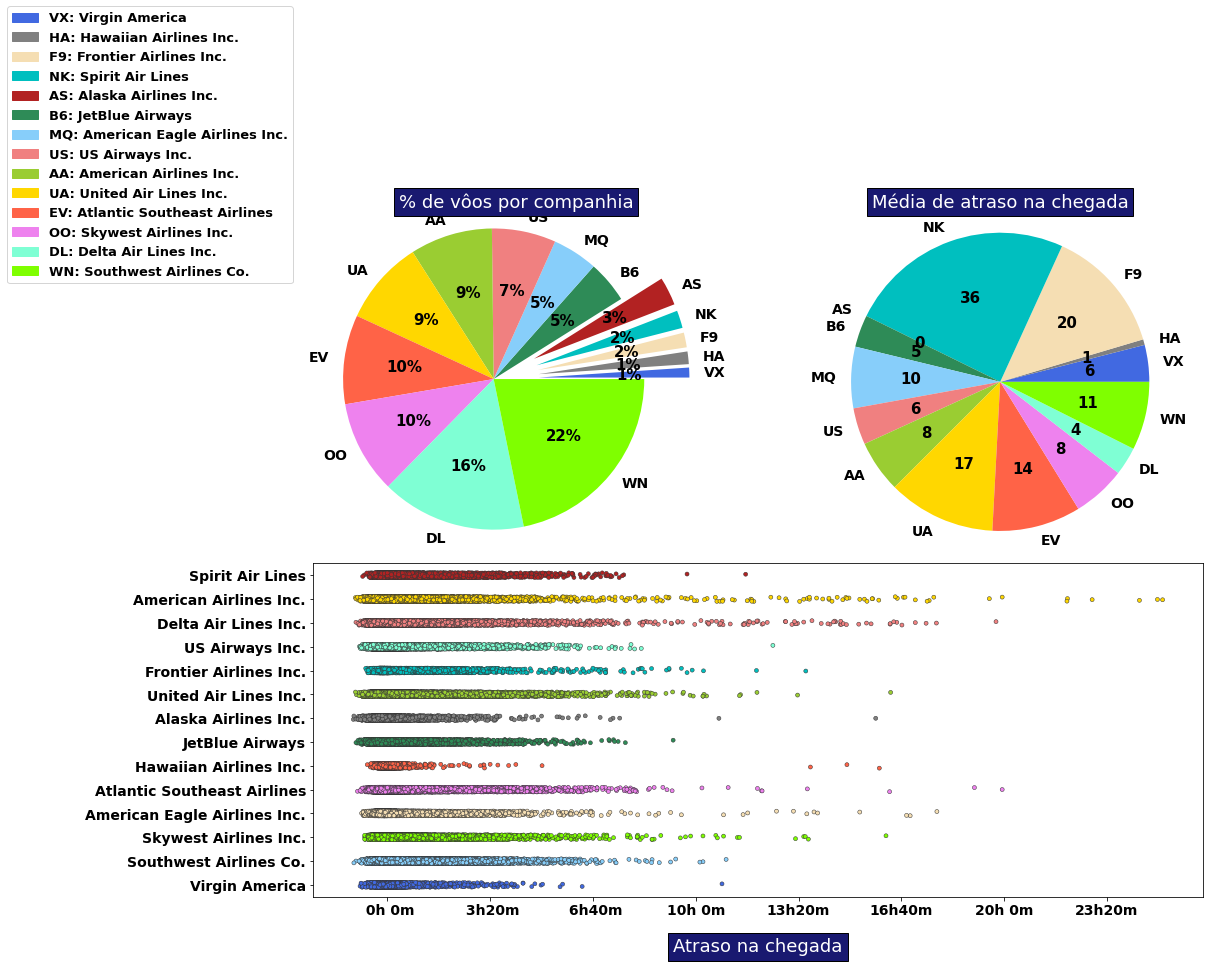

In [37]:
font = {'family' : 'normal', 'weight' : 'bold', 'size'   : 15}
mpl.rc('font', **font)
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec

df2 = df.loc[:, ['AIRLINE', 'ARRIVAL_DELAY']]
df2['AIRLINE'] = df2['AIRLINE'].replace(abbr_companies)

colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse']

fig = plt.figure(1, figsize=(16,15))
gs=GridSpec(2,2)             
ax1=fig.add_subplot(gs[0,0]) 
ax2=fig.add_subplot(gs[0,1]) 
ax3=fig.add_subplot(gs[1,:]) 

labels = [s for s in  global_stats.index]
sizes  = global_stats['count'].values
explode = [0.3 if sizes[i] < 20000 else 0.0 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax1.pie(sizes, explode = explode,
                                labels=labels, colors = colors,  autopct='%1.0f%%',
                                shadow=False, startangle=0)
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(14)
ax1.axis('equal')
ax1.set_title('% de vôos por companhia', bbox={'facecolor':'midnightblue', 'pad':5},
              color = 'w',fontsize=18)

comp_handler = []
for i in range(len(abbr_companies)):
    comp_handler.append(mpatches.Patch(color=colors[i],
            label = global_stats.index[i] + ': ' + abbr_companies[global_stats.index[i]]))
ax1.legend(handles=comp_handler, bbox_to_anchor=(0.2, 0.9), 
           fontsize = 13, bbox_transform=plt.gcf().transFigure)

sizes  = global_stats['mean'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax2.pie(sizes, explode = explode, labels = labels,
                                colors = colors, shadow=False, startangle=0,
                                autopct = lambda p :  '{:.0f}'.format(p * sum(sizes) / 100))
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(14)
ax2.axis('equal')
ax2.set_title('Média de atraso na chegada', bbox={'facecolor':'midnightblue', 'pad':5},
              color='w', fontsize=18)

colors = ['firebrick', 'gold', 'lightcoral', 'aquamarine', 'c', 'yellowgreen', 'grey',
          'seagreen', 'tomato', 'violet', 'wheat', 'chartreuse', 'lightskyblue', 'royalblue']

ax3 = sns.stripplot(y="AIRLINE", x="ARRIVAL_DELAY", size = 4, palette = colors,
                    data=df2, linewidth = 0.5,  jitter=True)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                         for x in ax3.get_xticks()])
plt.xlabel('Atraso na chegada', fontsize=18, bbox={'facecolor':'midnightblue', 'pad':5},
           color='w', labelpad=20)
ax3.yaxis.label.set_visible(False)

plt.tight_layout(w_pad=3)

Excluindo os vôos adiantados podemos perceber que as médias sofrem mudanças significativas, a Alaska Air Lines (AS), por exemplo, teve a maior média se considerarmos os vôos adiantados, porém excluindo eles, a maior média pertence a Spirit Air Lines (NK), isso provavelmente acontece porque grande parte dos vôos da AS chegaram ao destino adiantados.

/var/folders/q4/_8dm9trs61l02px1wmml5vhh0000gn/T/ipykernel_1708/3999025811.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])


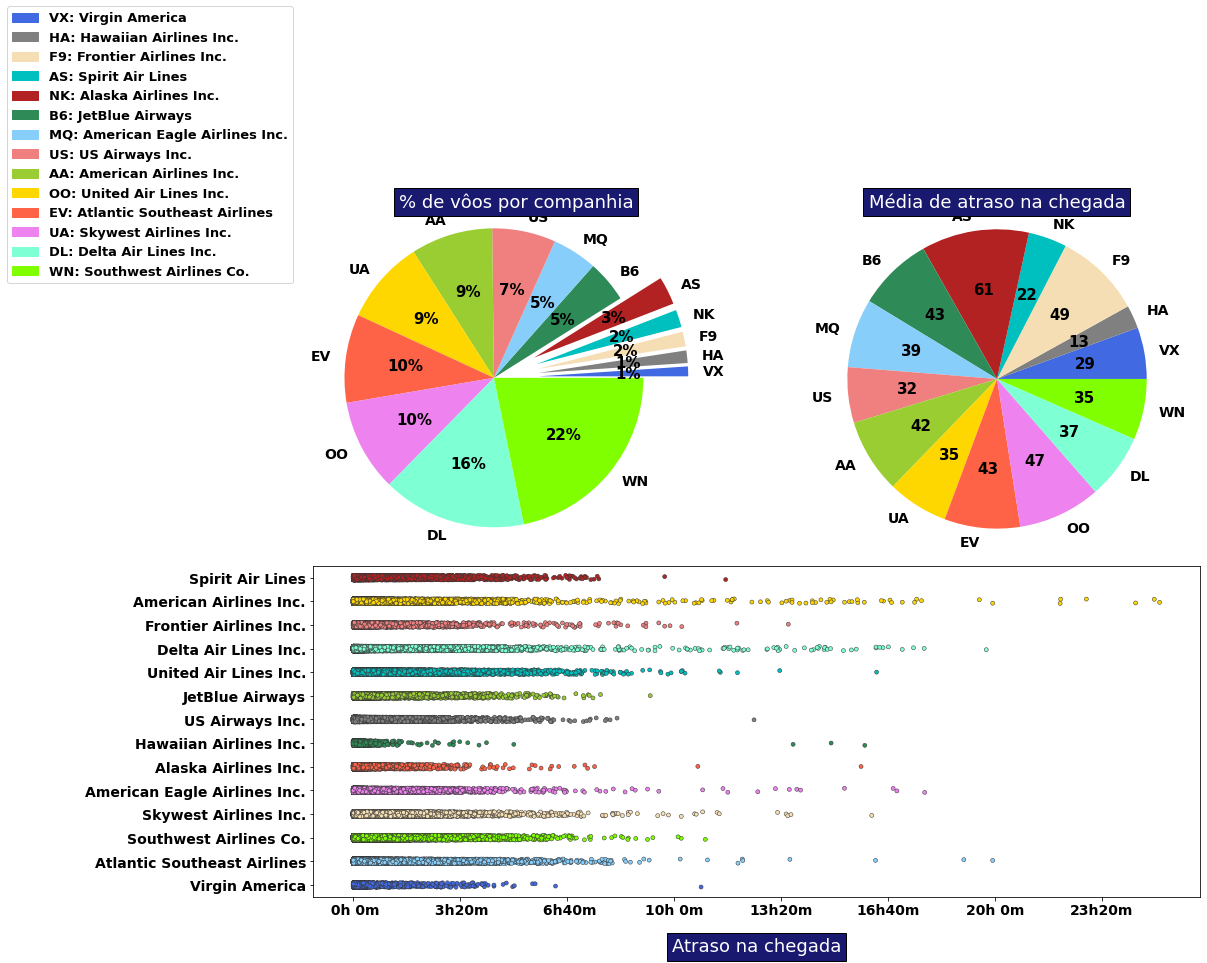

In [38]:
font = {'family' : 'normal', 'weight' : 'bold', 'size'   : 15}
mpl.rc('font', **font)
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec

df3 = flight_delays.loc[:, ['AIRLINE', 'ARRIVAL_DELAY']]
df3['AIRLINE'] = df3['AIRLINE'].replace(abbr_companies)

colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse']

fig = plt.figure(1, figsize=(16,15))
gs=GridSpec(2,2)             
ax1=fig.add_subplot(gs[0,0]) 
ax2=fig.add_subplot(gs[0,1]) 
ax3=fig.add_subplot(gs[1,:]) 

labels = [s for s in  global_stats.index]
sizes  = global_stats['count'].values
explode = [0.3 if sizes[i] < 20000 else 0.0 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax1.pie(sizes, explode = explode,
                                labels=labels, colors = colors,  autopct='%1.0f%%',
                                shadow=False, startangle=0)
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(14)
ax1.axis('equal')
ax1.set_title('% de vôos por companhia', bbox={'facecolor':'midnightblue', 'pad':5},
              color = 'w',fontsize=18)

comp_handler = []
for i in range(len(abbr_companies)):
    comp_handler.append(mpatches.Patch(color=colors[i],
            label = global_stats2.index[i] + ': ' + abbr_companies[global_stats.index[i]]))
ax1.legend(handles=comp_handler, bbox_to_anchor=(0.2, 0.9), 
           fontsize = 13, bbox_transform=plt.gcf().transFigure)

sizes  = global_stats2['mean'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax2.pie(sizes, explode = explode, labels = labels,
                                colors = colors, shadow=False, startangle=0,
                                autopct = lambda p :  '{:.0f}'.format(p * sum(sizes) / 100))
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(14)
ax2.axis('equal')
ax2.set_title('Média de atraso na chegada', bbox={'facecolor':'midnightblue', 'pad':5},
              color='w', fontsize=18)

colors = ['firebrick', 'gold', 'lightcoral', 'aquamarine', 'c', 'yellowgreen', 'grey',
          'seagreen', 'tomato', 'violet', 'wheat', 'chartreuse', 'lightskyblue', 'royalblue']

ax3 = sns.stripplot(y="AIRLINE", x="ARRIVAL_DELAY", size = 4, palette = colors,
                    data=df3, linewidth = 0.5,  jitter=True)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                         for x in ax3.get_xticks()])
plt.xlabel('Atraso na chegada', fontsize=18, bbox={'facecolor':'midnightblue', 'pad':5},
           color='w', labelpad=20)
ax3.yaxis.label.set_visible(False)

plt.tight_layout(w_pad=3)

Abaixo nós podemos ter uma noção melhor do número de vôos adiantados em comparação com o número de vôos atrasados e entender o porquê dessa diferença significativa nas médias. Observe que a Alaska Airlines Inc. tem um número muito maior de vôos pontuais e a Spirit Air Lines, em comparação com as outras companhias, possui uma desproporção entre vôos pontuais e vôos com pequenos e grandes atrasos.

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


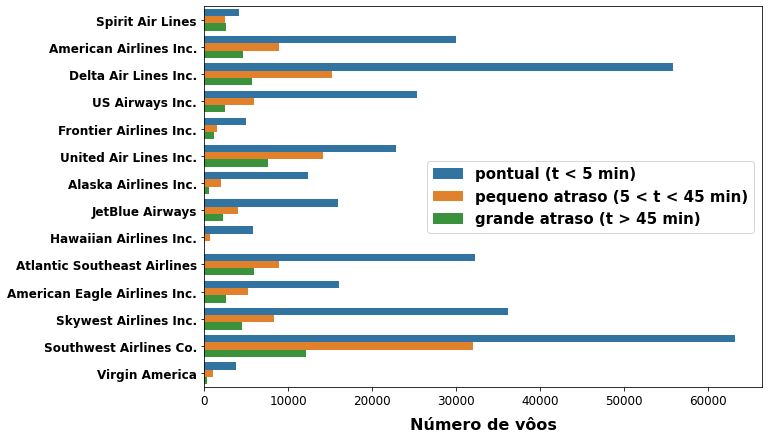

In [39]:
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
df['DELAY_LEVEL'] = df['DEPARTURE_DELAY'].apply(delay_type)

fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="AIRLINE", hue='DELAY_LEVEL', data=df)

labels = [abbr_companies[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Número de vôos', fontsize=16, weight = 'bold', labelpad=10)

L = plt.legend()
L.get_texts()[0].set_text('pontual (t < 5 min)')
L.get_texts()[1].set_text('pequeno atraso (5 < t < 45 min)')
L.get_texts()[2].set_text('grande atraso (t > 45 min)')
plt.show()

Distribuição de atrasos de cada companhia aérea. Fazendo uma comparação entre a Hawaiian Airlines Inc. (HA) e a Spirit Airlines Inc. (NK), podemos perceber que a curva decai bem rápido quando se trata da HA, isso siginifica que a companhia aérea não teve muitos vôos com grandes atrasos, bem diferente da AS que teve tanto pequenos atrasos como grandes atrasos.

/var/folders/q4/_8dm9trs61l02px1wmml5vhh0000gn/T/ipykernel_1708/2572641907.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['' for x in ax.get_xticks()])
/var/folders/q4/_8dm9trs61l02px1wmml5vhh0000gn/T/ipykernel_1708/2572641907.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['' for x in ax.get_xticks()])
/var/folders/q4/_8dm9trs61l02px1wmml5vhh0000gn/T/ipykernel_1708/2572641907.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['' for x in ax.get_xticks()])
/var/folders/q4/_8dm9trs61l02px1wmml5vhh0000gn/T/ipykernel_1708/2572641907.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['' for x in ax.get_xticks()])
/var/folders/q4/_8dm9trs61l02px1wmml5vhh0000gn/T/ipykernel_1708/2572641907.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.se

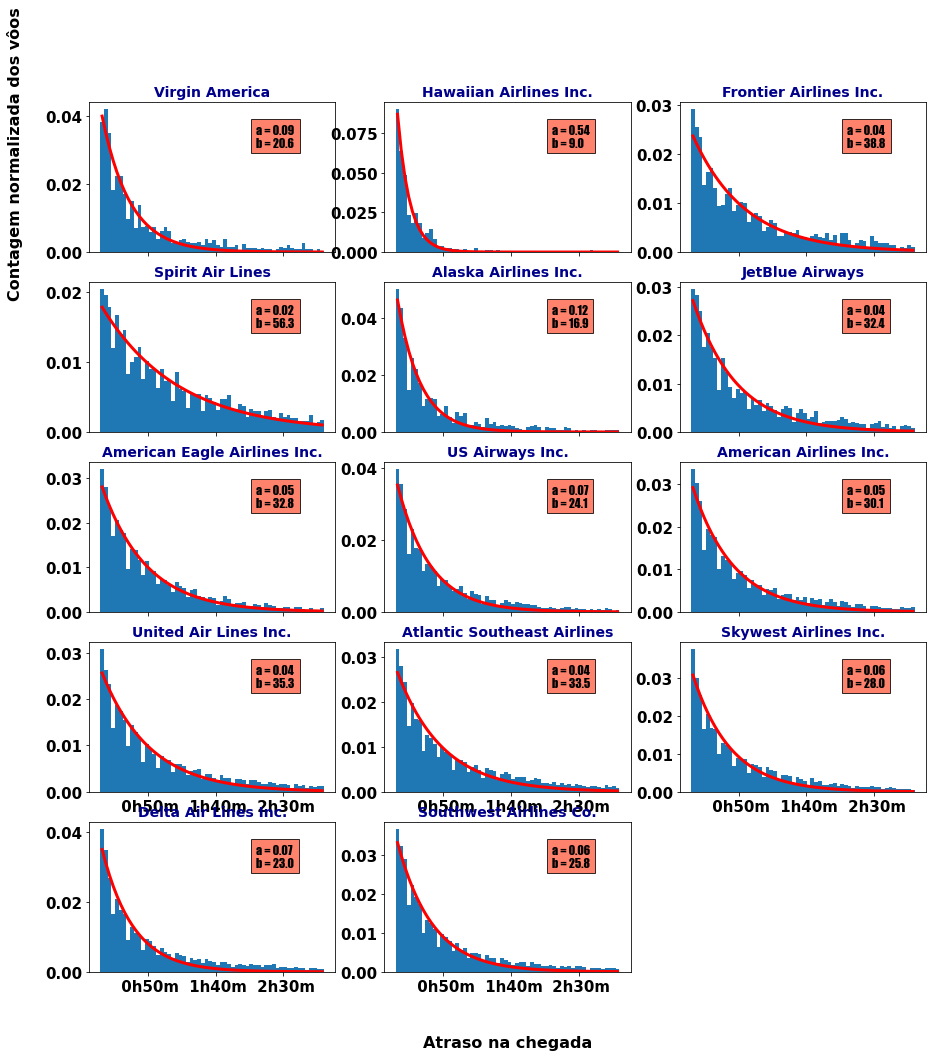

In [40]:
from scipy.optimize import curve_fit

def func(x, a, b):
    return a * np.exp(-x/b)

points = [] ; label_company = []
fig = plt.figure(1, figsize=(15,16))
i = 0
for carrier_name in [abbr_companies[x] for x in global_stats.index]:
    i += 1
    ax = fig.add_subplot(5,3,i)    
    
    n, bins, patches = plt.hist(x = df2[df2['AIRLINE']==carrier_name]['ARRIVAL_DELAY'],
                                range = (15,180), density=True, bins= 60)
    bin_centers = bins[:-1] + 0.5 * (bins[1:] - bins[:-1])    
    popt, pcov = curve_fit(func, bin_centers, n, p0 = [1, 2])
    
    points.append(popt)
    label_company.append(carrier_name)
    
    plt.plot(bin_centers, func(bin_centers, *popt), 'r-', linewidth=3)    
    
    if i < 10:
        ax.set_xticklabels(['' for x in ax.get_xticks()])
    else:
        ax.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                            for x in ax.get_xticks()])
    
    plt.title(carrier_name, fontsize = 14, fontweight = 'bold', color = 'darkblue')
     
    if i == 4:
        ax.text(-0.3,0.9,'Contagem normalizada dos vôos', fontsize=16, rotation=90,
            color='k', horizontalalignment='center', transform = ax.transAxes)
    if i == 14:
        ax.text( 0.5, -0.5 ,'Atraso na chegada', fontsize=16, rotation=0,
            color='k', horizontalalignment='center', transform = ax.transAxes)
    
    ax.text(0.68, 0.7, 'a = {}\nb = {}'.format(round(popt[0],2), round(popt[1],1)),
            style='italic', transform=ax.transAxes, fontsize = 12, family='fantasy',
            bbox={'facecolor':'tomato', 'alpha':0.8, 'pad':5})
    
plt.tight_layout()

Os valores da distribuição normalizada acima permitem criar um ranking das companhias. Os valores baixos de a correspondem as companhias aéreas com uma grande proporção de atrasos importantes. Logo, a Spirit Air Lines e a Frontier Airlines Inc. são as piores companhias. Mas observe que a diferença entre as duas é significativa, de longe a Spirit Air Lines é a pior. 

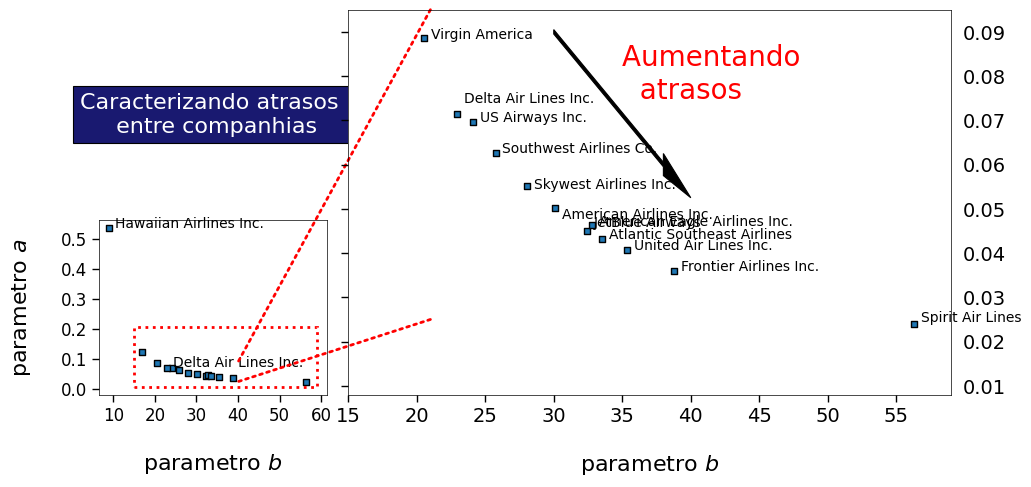

In [41]:
from matplotlib.patches import ConnectionPatch

mpl.rcParams.update(mpl.rcParamsDefault)
sns.set_context('paper')
import matplotlib.patches as patches

fig = plt.figure(1, figsize=(11,5))
y_shift = [0 for _ in range(14)]
y_shift[3] = 0.5/1000
y_shift[12] = 2.5/1000
y_shift[11] = -0.5/1000
y_shift[8] = -2.5/1000
y_shift[5] = 1/1000
x_val = [s[1] for s in points]
y_val = [s[0] for s in points]

gs=GridSpec(2,7)

ax1=fig.add_subplot(gs[1,0:2])
plt.scatter(x=x_val, y=y_val, marker = 's', edgecolor='black', linewidth = 1.0)

i= 1
ax1.annotate(label_company[i], xy=(x_val[i]+1.5, y_val[i]+y_shift[i]),
             xycoords='data', fontsize = 10)
plt.xlabel("parametro $b$", fontsize=16, labelpad=20)
plt.ylabel("parametro $a$", fontsize=16, labelpad=20)

i= 12
ax1.annotate(label_company[i], xy=(x_val[i]+1.5, y_val[i]+y_shift[i]),
             xycoords='data', fontsize = 10)
plt.xlabel("parametro $b$", fontsize=16, labelpad=20)
plt.ylabel("parametro $a$", fontsize=16, labelpad=20)

ax1.text(.5,1.5,'Caracterizando atrasos \n entre companhias', fontsize=16,
        bbox={'facecolor':'midnightblue', 'pad':5}, color='w',
        horizontalalignment='center',
        transform=ax1.transAxes)

for k in ['top', 'bottom', 'right', 'left']:
    ax1.spines[k].set_visible(True)
    ax1.spines[k].set_linewidth(0.5)
    ax1.spines[k].set_color('k')

rect = patches.Rectangle((15,0.008), 44, 0.20, linewidth=2,
                         edgecolor='r', linestyle=':', facecolor='none')
ax1.add_patch(rect)

ax2=fig.add_subplot(gs[0:2,2:])
plt.scatter(x=x_val, y=y_val, marker = 's', edgecolor='black', linewidth = 1.0)
plt.setp(ax1.get_xticklabels(), fontsize=12)
plt.setp(ax1.get_yticklabels(), fontsize=12)
ax2.set_xlim(15,59)
ax2.set_ylim(0.008,0.095)

for i in range(len(abbr_companies)):
    ax2.annotate(label_company[i], xy=(x_val[i]+0.5, y_val[i]+y_shift[i]),
                 xycoords='data', fontsize = 10)

ax2.arrow(30, 0.09, 8, -0.03, head_width=0.005,
          shape = 'full', head_length=2, fc='k', ec='k')
ax2.annotate('Aumentando \n  atrasos', fontsize= 20, color = 'r',
          xy=(35, 0.075), xycoords='data')

plt.tick_params(labelleft=False, labelright=True)
plt.setp(ax2.get_xticklabels(), fontsize=14)
plt.setp(ax2.get_yticklabels(), fontsize=14)

for k in ['top', 'bottom', 'right', 'left']:
    ax2.spines[k].set_visible(True)
    ax2.spines[k].set_linewidth(0.5)
    ax2.spines[k].set_color('k')    

xy2 = (40, 0.09) ; xy1 = (21, 0.095)
con = ConnectionPatch(xyA=xy1, xyB=xy2, coordsA="data", coordsB="data",
                      axesA=ax2, axesB=ax1,
                      linestyle=':', linewidth = 2, color="red")
ax2.add_artist(con)
xy2 = (40, 0.025) ; xy1 = (21, 0.025)
con = ConnectionPatch(xyA=xy1, xyB=xy2, coordsA="data", coordsB="data",
                      axesA=ax2, axesB=ax1,
                      linestyle=':', linewidth = 2, color="red")
ax2.add_artist(con)
plt.xlabel("parametro $b$", fontsize=16, labelpad=20)

plt.show()

Agora vamos comparar a diferença entre atrasos na saída e chegada. Podemos ver que a Spirit Air Lines tem uma média bem proxíma entre os dois tipos de atrasos. A Hawaiian Airlines Inc. é um caso interessante, os vôos saem adiantados mas chegam atrasados, as features WHEELS_OUT e TAXI_OUT poderiam ser analisadas para entender se a raiz do problema são os aeroportos que demoram a permitir a chegada nos portões.

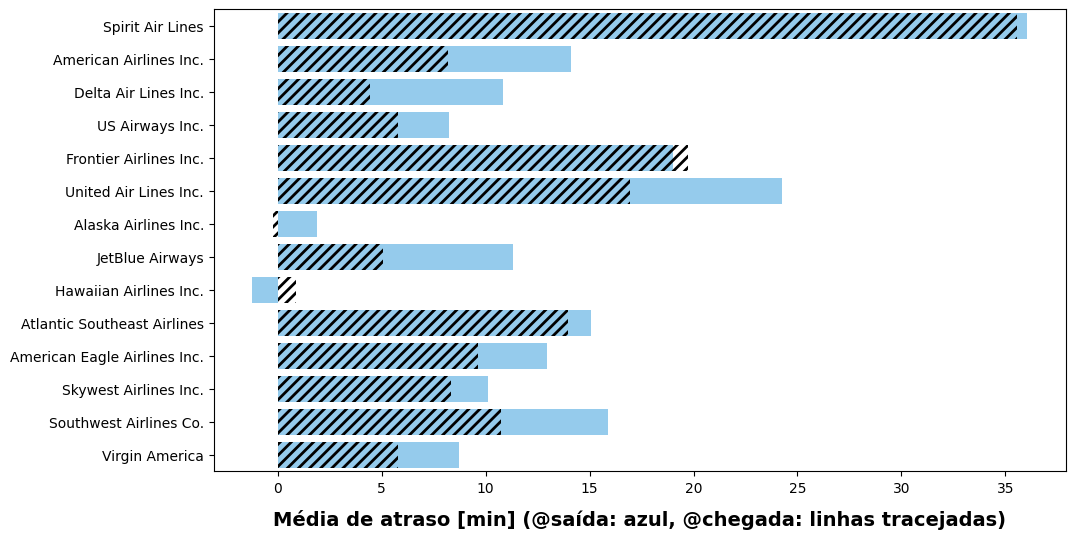

In [42]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 2.0  

fig = plt.figure(1, figsize=(11,6))
ax = sns.barplot(x="DEPARTURE_DELAY", y="AIRLINE", data=df, color="lightskyblue", ci=None)
ax = sns.barplot(x="ARRIVAL_DELAY", y="AIRLINE", data=df, color="r", hatch = '///',
                 alpha = 0.0, ci=None)
labels = [abbr_companies[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
ax.yaxis.label.set_visible(False)
plt.xlabel('Média de atraso [min] (@saída: azul, @chegada: linhas tracejadas)',
           fontsize=14, weight = 'bold', labelpad=10);

Tentaremos agora definir se há correlação entre os atrasos registrados e os aeroportos de destino.

In [43]:
origin_nb = dict()
for carrier in abbr_companies.keys():
    liste_origin_airport = df[df['AIRLINE'] == carrier]['DESTINATION_AIRPORT'].unique()
    origin_nb[carrier] = len(liste_origin_airport)

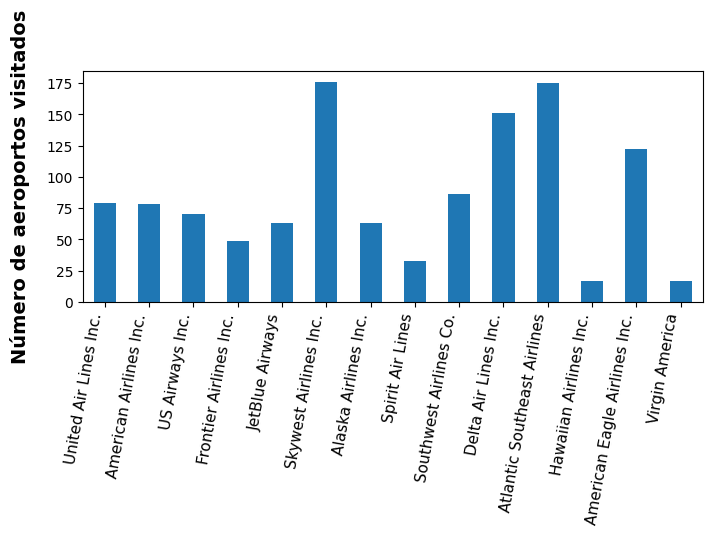

In [44]:
test_df = pd.DataFrame.from_dict(origin_nb, orient='index')
test_df.rename(columns = {0:'count'}, inplace = True)
ax = test_df.plot(kind='bar', figsize = (8,3))
labels = [abbr_companies[item.get_text()] for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)
plt.ylabel('Número de aeroportos visitados', fontsize=14, weight = 'bold', labelpad=12)
plt.setp(ax.get_xticklabels(), fontsize=11, ha = 'right', rotation = 80)
ax.legend().set_visible(False)
plt.show()

Calculando as médias de atrasos por aeroporto.

In [45]:
airport_mean_delays = pd.DataFrame(pd.Series(df['DESTINATION_AIRPORT'].unique()))
airport_mean_delays.set_index(0, drop = True, inplace = True)

for carrier in abbr_companies.keys():
    df1 = df[df['AIRLINE'] == carrier]
    test = df1['ARRIVAL_DELAY'].groupby(df['DESTINATION_AIRPORT']).apply(get_stats).unstack()
    airport_mean_delays[carrier] = test.loc[:, 'mean'] 

Selecionando um subconjunto dos dados obtidos anteriormente, precisamente os 100 primeiros. Olhando para coluna da Spirit Air Lines, podemos ver que grande parte das células são cinzas, o que repreenta atrasos entre 30 e 35 minutos. Mas há linhas, como a linha do aeroporto de Chicago que tem muitas células azuis, o que representa atrasos em torno de 20 minutos. Dessa forma, podemos perceber que atrasos podem ocorrer tanto de acordo com a companhia quanto de acordo com o aeroporto. Por esse motivo, decidi desenvolver um modelo específico para uma companhia e um aeroporto de destino.

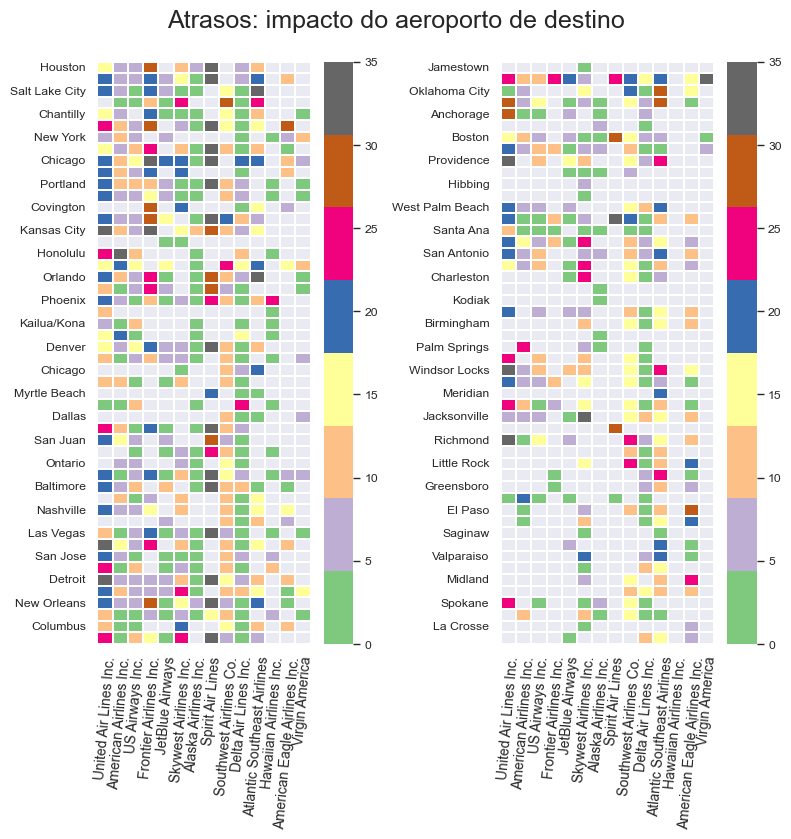

In [46]:
identify_airport = airports.set_index('IATA_CODE')['CITY'].to_dict()

sns.set(context="paper")
fig = plt.figure(1, figsize=(8,8))

ax = fig.add_subplot(1,2,1)
subset = airport_mean_delays.iloc[:50,:].rename(columns = abbr_companies)
subset = subset.rename(index = identify_airport)
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.01, cmap="Accent", mask=mask, vmin = 0, vmax = 35)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation = 85) ;
ax.yaxis.label.set_visible(False)

ax = fig.add_subplot(1,2,2)    
subset = airport_mean_delays.iloc[50:100,:].rename(columns = abbr_companies)
subset = subset.rename(index = identify_airport)
fig.text(0.5, 1.02, "Atrasos: impacto do aeroporto de destino", ha='center', fontsize = 18)
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.01, cmap="Accent", mask=mask, vmin = 0, vmax = 35)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation = 85) ;
ax.yaxis.label.set_visible(False)

plt.tight_layout()


O modelo vai usar uma janela de 3 semanas para prever os atrasos da semana seguinte. Mais precisamente, o modelo irá prever os atrasos entre 23 e 30 de junho.

In [47]:
df_train = df[df['SCHEDULED_ARRIVAL'].apply(lambda x:x.date()) < datetime.date(2015, 6, 23)]
df_test  = df[df['SCHEDULED_ARRIVAL'].apply(lambda x:x.date()) > datetime.date(2015, 6, 23)]
df = df_train

Verificando o número de vôos da Spirit Air Lines que chegam em cada aeroporto. A tabela mostra os aeroportos que recebeu o menor número de vôos dessa companhia. Visto que o número de vôos nesses aeroportos menos visitados durante o mês de Junho são bem poucos, não podemos performar regressão usando algum deles.

In [48]:
carrier = 'NK'
check_airports = df[(df['AIRLINE'] == carrier)]['ARRIVAL_DELAY'].groupby(
                         df['DESTINATION_AIRPORT']).apply(get_stats).unstack()
check_airports.sort_values('count', ascending = False, inplace = True)
check_airports[-5:]

,min,max,count,mean
DESTINATION_AIRPORT,,,,
STT,-22.0,100.0,22.0,6.045455
IAG,-16.0,180.0,18.0,37.833333
PBG,-11.0,190.0,16.0,24.000000
BQN,-9.0,135.0,13.0,43.538462
CRW,-18.0,22.0,10.0,-4.300000


Buscando agora os aeroportos de destino mais visitados pela companhia escolhida.

In [49]:
carrier = 'NK'
check_airports = df[(df['AIRLINE'] == carrier)]['ARRIVAL_DELAY'].groupby(
                         df['DESTINATION_AIRPORT']).apply(get_stats).unstack()
check_airports.sort_values('count', ascending = True, inplace = True)
check_airports[-5:]

,min,max,count,mean
DESTINATION_AIRPORT,,,,
DTW,-38.0,445.0,428.0,46.605140
DFW,-36.0,320.0,569.0,37.130053
LAS,-31.0,405.0,587.0,34.243612
ORD,-34.0,434.0,663.0,54.126697
FLL,-48.0,427.0,699.0,30.988555


A classe a seguir tem dois métodos: train(n, nb_folds) e calc_score(n, nb_folds), sendo nb_folds o número de conjuntos de treinamento e n a ordem do polinômio. Em train o modelo é criado e retorna as predições, e em calc_score fit score é calculado e retornado.

In [50]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score, cross_val_predict

class fit_polynome_cv:

    def __init__(self, data):
        self.data = data[['mean', 'heure_arrival_min']].dropna(how='any', axis = 0)
        self.X = np.array(self.data['heure_arrival_min'])
        self.Y = np.array(self.data['mean'])
        self.X = self.X.reshape(len(self.X),1)
        self.Y = self.Y.reshape(len(self.Y),1)

    def train(self, pol_order, nb_folds):
        self.poly = PolynomialFeatures(degree = pol_order)
        self.regr = linear_model.LinearRegression()
        self.X_ = self.poly.fit_transform(self.X)
        self.result = cross_val_predict(self.regr, self.X_, self.Y, cv = nb_folds)
    
    def calc_score(self, pol_order, nb_folds):
        self.poly = PolynomialFeatures(degree = pol_order)
        self.regr = linear_model.LinearRegression()
        self.X_ = self.poly.fit_transform(self.X)
        self.score = np.mean(cross_val_score(self.regr, self.X_, self.Y,
                                             cv = nb_folds, scoring = 'mean_squared_error'))

A classe a seguir tem três métodos: split(self, method), train(self, pol_order), predict(self, X) e calc_score(self), sendo que o parâmetro method indica como a divisão dos dados deve ser feita, pol_order indica a ordem do polinômio e X os dados das features escolhidas que tem correlação com o Y que queremos prever. O método split divide o conjunto de dados, train cria o modelo, predict calcula os pontos Y e calc_score calcula o score do modelo.

In [51]:
from sklearn import metrics, linear_model
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

class fit_polynome:

    def __init__(self, data):
        self.data = data[['mean', 'heure_arrival_min']].dropna(how='any', axis = 0)

    def split(self, method):        
        self.method = method        
        self.X = np.array(self.data['heure_arrival_min'])
        self.Y = np.array(self.data['mean'])
        self.X = self.X.reshape(len(self.X),1)
        self.Y = self.Y.reshape(len(self.Y),1)

        if method == 'all':
            self.X_train = self.X
            self.Y_train = self.Y
            self.X_test  = self.X
            self.Y_test  = self.Y                        
        elif method == 'split':            
            self.X_train, self.X_test, self.Y_train, self.Y_test = \
                train_test_split(self.X, self.Y, test_size=0.3)
    
    def train(self, pol_order):
        self.poly = PolynomialFeatures(degree = pol_order)
        self.regr = linear_model.LinearRegression()
        self.X_ = self.poly.fit_transform(self.X_train)
        self.regr.fit(self.X_, self.Y_train)
    
    def predict(self, X):
        self.X_ = self.poly.fit_transform(X)
        self.result = self.regr.predict(self.X_)
    
    def calc_score(self):        
        X_ = self.poly.fit_transform(self.X_test)
        result = self.regr.predict(X_)
        self.score = metrics.mean_squared_error(result, self.Y_test)

A função a seguir remove do conjunto de dados os atrasos "acidentais": longos atrasos que ocupam uma porcentagem muito pequena do conjunto e são, muito provavelmente, causados por eventos imprevisíveis como clima e acidentes.

In [52]:
def get_flight_delays(df, carrier, id_airport, extrem_values = False):
    df2 = df[(df['AIRLINE'] == carrier) & (df['DESTINATION_AIRPORT'] == id_airport)]
    
    if extrem_values:
        df2['ARRIVAL_DELAY'] = df2['ARRIVAL_DELAY'].apply(lambda x:x if x < 60 else np.nan)
        df2.dropna(how = 'any')
    
    df2.sort_values('SCHEDULED_ARRIVAL', inplace = True)
    df2['heure_arrival'] =  df2['SCHEDULED_ARRIVAL'].apply(lambda x:x.time())
    
    test2 = df2['ARRIVAL_DELAY'].groupby(df2['heure_arrival']).apply(get_stats).unstack()
    test2.reset_index(inplace=True)
    
    fct = lambda x:x.hour*3600+x.minute*60+x.second
    test2.reset_index(inplace=True)
    test2['heure_arrival_min'] = test2['heure_arrival'].apply(fct)
    return test2

In [53]:
id_airport = 'FLL'
test2 = get_flight_delays(df, carrier, id_airport, True)

/var/folders/q4/_8dm9trs61l02px1wmml5vhh0000gn/T/ipykernel_1708/792369163.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ARRIVAL_DELAY'] = df2['ARRIVAL_DELAY'].apply(lambda x:x if x < 60 else np.nan)
/var/folders/q4/_8dm9trs61l02px1wmml5vhh0000gn/T/ipykernel_1708/792369163.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.sort_values('SCHEDULED_ARRIVAL', inplace = True)
/var/folders/q4/_8dm9trs61l02px1wmml5vhh0000gn/T/ipykernel_1708/792369163.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [54]:
fit = fit_polynome(test2)
fit.split('all')
fit.train(pol_order = 2)
fit.predict(fit.X)

In [55]:
nb_folds = 10
fit2 = fit_polynome_cv(test2)
fit2.train(pol_order = 2, nb_folds = nb_folds)

In [56]:
test_data = get_flight_delays(df_test, carrier, id_airport, True)
test_data = test_data[['mean', 'heure_arrival_min']].dropna(how='any', axis = 0)
X_test = np.array(test_data['heure_arrival_min'])
Y_test = np.array(test_data['mean'])
X_test = X_test.reshape(len(X_test),1)
Y_test = Y_test.reshape(len(Y_test),1)
fit.predict(X_test)

/var/folders/q4/_8dm9trs61l02px1wmml5vhh0000gn/T/ipykernel_1708/792369163.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ARRIVAL_DELAY'] = df2['ARRIVAL_DELAY'].apply(lambda x:x if x < 60 else np.nan)
/var/folders/q4/_8dm9trs61l02px1wmml5vhh0000gn/T/ipykernel_1708/792369163.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.sort_values('SCHEDULED_ARRIVAL', inplace = True)
/var/folders/q4/_8dm9trs61l02px1wmml5vhh0000gn/T/ipykernel_1708/792369163.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

O valor do MSE obtido

In [57]:
score = metrics.mean_squared_error(fit.result, Y_test)
score

119.28946415530814

A diferença entre os reais atrasos e os atrasos previstos é geralmente igual a 10 minutos.

In [58]:
'Ecart = {:.2f} min'.format(np.sqrt(score))

'Ecart = 10.92 min'